In [160]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

priority, window, num_nodes, ave_sum_stay_t, se_sum_stay_t, ave_sum_task_t, se_sum_task_t, ave_var_task_t, se_var_task_t = np.loadtxt("./data/exp/data_true", delimiter=',', unpack=True)
priority_f, window_f, num_nodes_f, ave_sum_stay_f, se_sum_stay_f, ave_sum_task_f, se_sum_task_f, ave_var_task_f, se_var_task_f = np.loadtxt("./data/exp/data_false", delimiter=',', unpack=True)
print(window)
print(num_nodes)
print(ave_sum_stay_t)
print(se_sum_stay_t)

[-1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  2.
  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.  5.
  5.  5.  5.  5.  5.  5.]
[ 1.  2.  4.  5.  6.  8. 12.  1.  2.  4.  5.  6.  8. 12.  1.  2.  4.  5.
  6.  8. 12.  1.  2.  4.  5.  6.  8. 12.  1.  2.  4.  5.  6.  8. 12.  1.
  2.  4.  5.  6.  8. 12.]
[2.9000000e+00 5.0000000e+00 1.1030000e+01 1.3020000e+01 1.5830000e+01
 2.1030000e+01 3.1760000e+01 6.2920000e+01 5.9563400e+03 2.4636010e+04
 3.6788250e+04 4.9588770e+04 7.3768030e+04 1.1732880e+05 1.9933000e+02
 6.3311200e+03 2.1545310e+04 3.1511050e+04 4.3089640e+04 6.7270420e+04
 1.1146426e+05 6.2500000e+01 3.6013700e+03 1.9699790e+04 3.2391780e+04
 4.5758480e+04 7.1870910e+04 1.1587675e+05 6.2040000e+01 3.8554000e+03
 2.0408070e+04 3.3062810e+04 4.7064980e+04 7.2949220e+04 1.1714594e+05
 6.3050000e+01 3.9820700e+03 2.0854950e+04 3.3609920e+04 4.7458320e+04
 7.3345500e+04 1.1729315e+05]
[1.78000e-01 2.06000e-01 3.38000e-01 3.52000e-01 4.19000e-

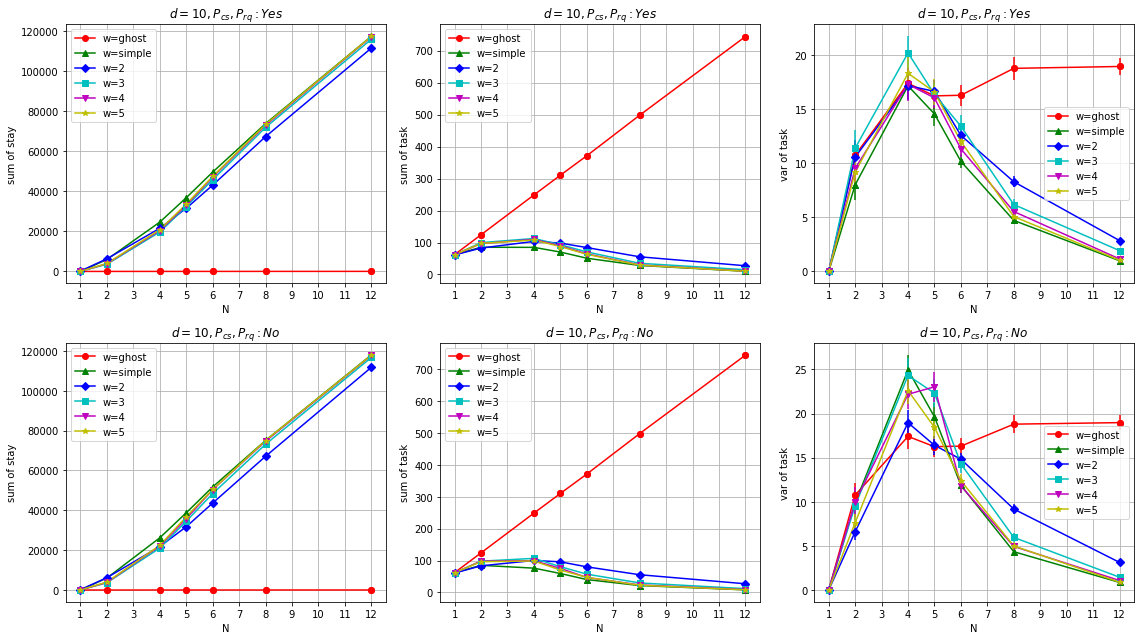

In [161]:
MAX_NUM_NODES = 12
NUM_TYPE_NUM_NODES = 7 # 1, 2, 4, 5, 6, 8, 12 -> 7 types
WINDOW_SIZES = ['simple', '2', '3', '4', '5']
NUM_WINDOW_SIZE = 5

COLORS = ["r", "g", "b", "c", "m", "y", "k", "w"]
MARKERS = ['o', '^', 'D', 's', 'v', '*']

plt.figure(figsize=(16, 9))

def data_plot(xdata, ydata, errdata, title, ylabel, xlabel='N'):
    """
    Plot graph with xdata and ydata.
    The second param errdata represents yerror.
    """
    for i in range(NUM_WINDOW_SIZE):
        x = xdata[NUM_TYPE_NUM_NODES*i:NUM_TYPE_NUM_NODES*(i+1)]
        y = ydata[NUM_TYPE_NUM_NODES*i:NUM_TYPE_NUM_NODES*(i+1)]
        err = errdata[NUM_TYPE_NUM_NODES*i:NUM_TYPE_NUM_NODES*(i+1)]
        plt.errorbar(x, y, yerr=err, fmt=COLORS[i]+MARKERS[i], ecolor=COLORS[i])
        plt.plot(x, y, marker=MARKERS[i], color=COLORS[i], label='w='+WINDOW_SIZES[i])
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(1, MAX_NUM_NODES+1, 1.0))
    plt.grid()
    plt.legend()

plt.subplot(2, 3, 1)
data_plot(num_nodes, ave_sum_stay_t, se_sum_stay_t, '$d=10, P_{cs}, P_{rq}: Yes$', 'sum of stay')

plt.subplot(2, 3, 2)
data_plot(num_nodes, ave_sum_task_t, se_sum_task_t, '$d=10, P_{cs}, P_{rq}: Yes$', 'sum of task')

plt.subplot(2, 3, 3)
data_plot(num_nodes, ave_var_task_t, se_var_task_t, '$d=10, P_{cs}, P_{rq}: Yes$',  'var of task')

plt.subplot(2, 3, 4)
data_plot(num_nodes, ave_sum_stay_f, se_sum_stay_f, '$d=10, P_{cs}, P_{rq}: No$',  'sum of stay')

plt.subplot(2, 3, 5)
data_plot(num_nodes, ave_sum_task_f, se_sum_task_f, '$d=10, P_{cs}, P_{rq}: No$',  'sum of task')

plt.subplot(2, 3, 6)
data_plot(num_nodes, ave_var_task_f, se_var_task_f, '$d=10, P_{cs}, P_{rq}: No$',  'var of task')

plt.tight_layout()